# HW3 - Scraping and Regression
## Part 1 - Data Acquisition

In [12]:

import pandas as pd
#install the bs4 package through pip.  I think the beautifulsoup pacakage is a much older version?
from bs4 import BeautifulSoup
import os
import re
import urllib.request
import time

#get Files from Urls


# here we actually access the website
def openhtmlAndSave(url, i):
    time.sleep(1) 

    with urllib.request.urlopen(url) as response:
        html = response.read()
        html = html.decode('utf-8')

    with open('HtmlFiles/HackerNewsStoriesPage_{}.html'.format(i), 'w') as new_file:
        new_file.write(html)  

openhtmlAndSave("https://news.ycombinator.com/news",1)
openhtmlAndSave("https://news.ycombinator.com/news?p=2",2)
openhtmlAndSave("https://news.ycombinator.com/news?p=3",3)
openhtmlAndSave("https://news.ycombinator.com/news?p=4",4)
openhtmlAndSave("https://news.ycombinator.com/news?p=5",5)



directory_path = 'HtmlFiles/'
HackerNewsStories = BeautifulSoup('', 'html.parser')
for filename in os.listdir(directory_path):
    if filename.endswith('.html'):
        file_path = os.path.join(directory_path, filename)
        with open(file_path, 'r') as file:
            html_content = file.read()
        # Parse the HTML content and append it to the merged_html object
        HackerNewsStories.append(BeautifulSoup(html_content, 'html.parser'))

output_file_path = 'allStories.html'
with open(output_file_path, 'w') as output_file:
    output_file.write(HackerNewsStories.prettify())

ranks = [int(p.get_text().rstrip('.')) for p in HackerNewsStories.find_all('span', {'class': 'rank'})] 
titles_length = [len(p.find_all('a')[0].get_text()) for p in HackerNewsStories.find_all('span', {'class': 'titleline'})]
ages = [p.find_all('a')[0].get_text() for p in HackerNewsStories.find_all('span', {'class': 'age'})] 
points =[int(p.get_text().split()[0]) for p in HackerNewsStories.find_all('span', {'class': 'score'})] 
comments = [p.find_all('a')[-1].get_text() for p in HackerNewsStories.find_all('span', {'class': 'subline'})] 

# Function to convert time to hours
def convert_to_hours(age):
    match = re.search(r'(\d+)\s+(\w+)', age)
    if match:
        amount = int(match.group(1))
        unit = match.group(2).lower()
        if unit == 'hour' or unit == 'hours':
            return amount
        elif unit == 'day' or unit == 'days':
            return amount * 24
        elif unit == 'minute' or unit == 'minutes':
            return amount / 60

for i in range(len(ages)):
        ages[i] = int(convert_to_hours(ages[i]))

# Process comments to extract the numeric value
def process_comments(comment):
    matches = re.findall(r'\d+', comment)
    if matches:
        return int(matches[0])
    else:
        return 0

# Update comments list with processed values
comments = [process_comments(comment) for comment in comments]


# Determine the maximum length among the lists
max_length = max(len(ranks), len(titles_length), len(ages),len(points), len(comments))

# Pad the shorter lists with a default value (e.g., None)
ranks_padded = ranks + ['No Rank'] * (max_length - len(ranks))
titles_length_padded = titles_length + ['No Title'] * (max_length - len(titles_length))
ages_padded = ages + ['No Age'] * (max_length - len(ages))
points_padded = points + ['0'] * (max_length - len(points))
comments_padded = comments + ['0'] * (max_length - len(comments))

points_padded = [int(x) for x in points_padded]
comments_padded = [int(x) for x in comments_padded]

stories = {'Rank':ranks_padded,
           'TitleLength':titles_length_padded,
           'Age':ages_padded,
           'Points' : points_padded,
           "Comments" : comments_padded
           }

df = pd.DataFrame(stories)

# Print the DataFrame
print(df)


# Save DataFrame as CSV file
output_file_path = 'stories.csv'
df.to_csv(output_file_path, index=False)

# Confirm the file is saved
print("CSV file saved successfully.")


     Rank  TitleLength  Age  Points  Comments
0       1           24    2     351       165
1       2           57    2     306       142
2       3           35    2     117        34
3       4           14    3     188        69
4       5           24    2      96        20
..    ...          ...  ...     ...       ...
145   116           59   13      90       147
146   117           37   23       4         0
147   118           72    2      49        12
148   119           18    3     129        48
149   120           37   24       0         0

[150 rows x 5 columns]
CSV file saved successfully.


## Part 2 - Regression

R^2 for model 1: 3.319469918916518e-05
R^2 for model 2: 0.0004997100571335622
R^2 for model 3: 0.4010508852870406
R^2 for model 4: 0.42063852727151796
                            OLS Regression Results                            
Dep. Variable:                   Rank   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                   0.07399
Date:                Tue, 13 Jun 2023   Prob (F-statistic):              0.786
Time:                        16:50:38   Log-Likelihood:                -778.03
No. Observations:                 150   AIC:                             1560.
Df Residuals:                     148   BIC:                             1566.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|     

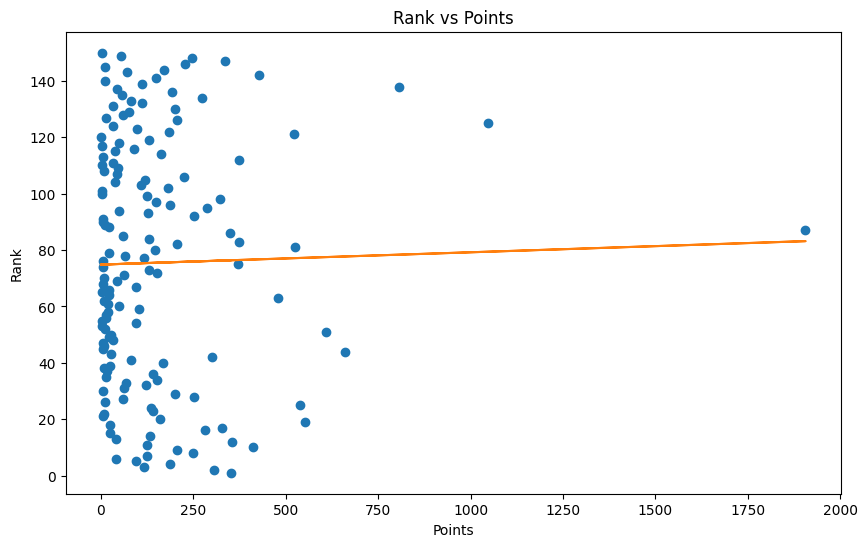

In [13]:
import scipy as sc
import numpy as np

import pandas as pd
import statsmodels.formula.api as sm
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


# Perform the regressions
model1 = sm.ols('Rank ~  TitleLength', data=df).fit()
model2 = sm.ols('Rank ~  Points ', data=df).fit()
model3 = sm.ols('Rank ~  Age ', data=df).fit()
model4 = sm.ols('Rank ~ TitleLength + Age + Points + Comments', data=df).fit()

# Print the R^2 scores
print('R^2 for model 1:', model1.rsquared)
print('R^2 for model 2:', model2.rsquared)
print('R^2 for model 3:', model3.rsquared)
print('R^2 for model 4:', model4.rsquared)

print(model2.summary())
# Plot the data
predicted_ranks = model2.predict()
plt.plot(df['Points'], df['Rank'], 'o')
plt.plot(df['Points'], predicted_ranks, '-')
plt.xlabel('Points')
plt.ylabel('Rank')
plt.title('Rank vs Points')
plt.show()


## Part 3 - Classification

# FrontPage, # NotFrontPage: 84 66
FrontPage vs Title Length :  97.37%
# FrontPage, # NotFrontPage: 92 58
FrontPage vs Age: 100.00%


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/homebrew/lib/python3.11/site-packages/

Text(0.5, 1.0, 'FrontPage vs Age')

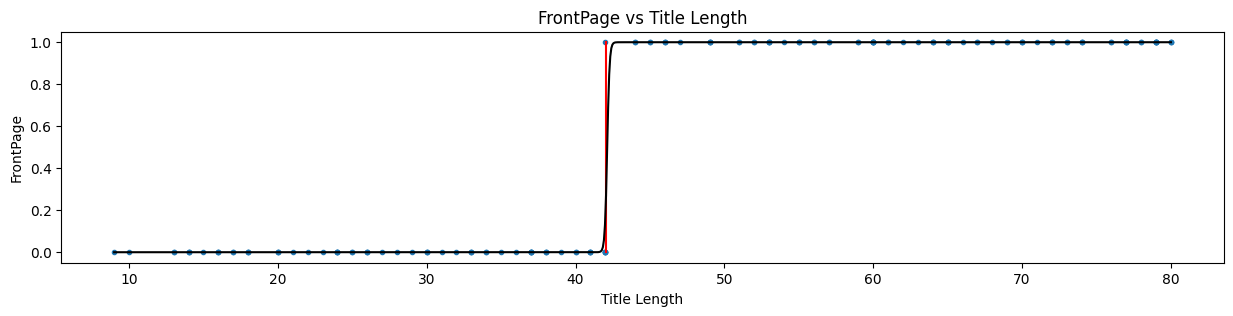

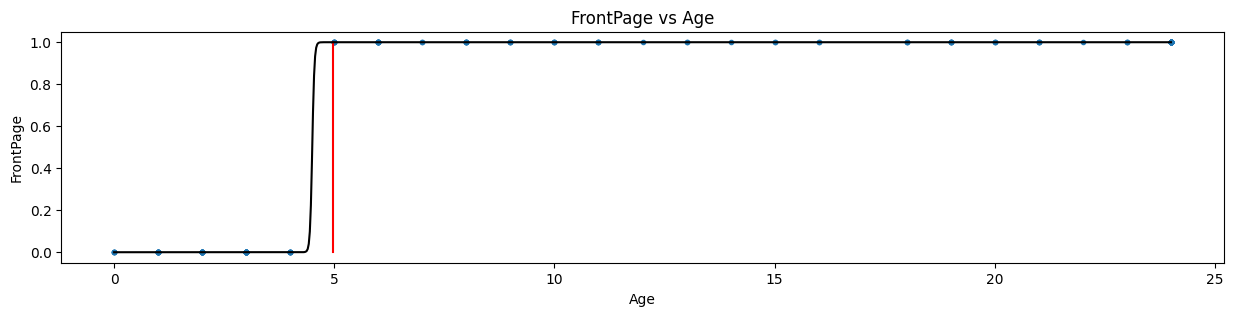

In [14]:
import numpy as np
from   random import random

import statsmodels.api as sm
import statsmodels.formula.api as smf

import pandas as pd

from   matplotlib.pyplot import plot
from   matplotlib import pyplot as plt

from   sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay



# Create the dependent variable
rank = df['Rank']

average_first_30_titleLength = df.TitleLength.head(30).mean()
def noise( x ):
    mod = (random() - 0.5) / 4 # Little noise / uncertainty
    #mod = (random() - 0.5) # Lots of noice and uncertainty
    return ( x + mod ) >= average_first_30_titleLength

df["FrontPage_On_TitleLength"] = df.TitleLength.apply( noise ).astype( float )
print( "# FrontPage, # NotFrontPage:", len( df[ df.FrontPage_On_TitleLength == 1.0 ] ), len( df[ df.FrontPage_On_TitleLength == 0.0 ] ) )

odds  = lambda p: p/(1-p)
logit = lambda p: np.log( odds(p) )
logistic = lambda x: 1 / ( 1 + np.exp(-x) )

r_title_length_vs_frontpage = smf.logit( "FrontPage_On_TitleLength ~ TitleLength", data=df ).fit( disp=0 )
print( "FrontPage vs Title Length :  %.2f%%"   % ( r_title_length_vs_frontpage.prsquared * 100 ) )
plt.figure( figsize=( 15, 3) )
plot( df.TitleLength, df.FrontPage_On_TitleLength, "." )
plot( [average_first_30_titleLength,average_first_30_titleLength], [0,1], 'r')

par = dict( r_title_length_vs_frontpage.params )
xs = np.linspace( df.TitleLength.min(), df.TitleLength.max(), 1000 )
ys = logistic( par['Intercept'] + par['TitleLength']*xs )
plt.plot( xs, ys, color='Black' ) # Smushed line

plt.xlabel( "Title Length" )
plt.ylabel( "FrontPage" )
plt.title( "FrontPage vs Title Length" )


average_first_30_age = df.Age.head(30).mean()
def noise( x ):
    mod = (random() - 0.5) / 16 # Little noise / uncertainty
    #mod = (random() - 0.5) # Lots of noice and uncertainty
    return ( x + mod ) >= average_first_30_age

df["FrontPage_On_Age"] = df.Age.apply( noise ).astype( float )
print( "# FrontPage, # NotFrontPage:", len( df[ df.FrontPage_On_Age == 1.0 ] ), len( df[ df.FrontPage_On_Age == 0.0 ] ) )

odds  = lambda p: p/(1-p)
logit = lambda p: np.log( odds(p) )
logistic = lambda x: 1 / ( 1 + np.exp(-x) )

r_age_vs_frontpage = smf.logit( "FrontPage_On_Age ~ Age", data=df ).fit( disp=0 )
print( "FrontPage vs Age: %.2f%%"   % ( r_age_vs_frontpage.prsquared * 100 ) )
plt.figure( figsize=( 15, 3) )
plot( df.Age, df.FrontPage_On_Age, "." )
plot( [average_first_30_age,average_first_30_age], [0,1], 'r')

par = dict( r_age_vs_frontpage.params )
xs = np.linspace( df.Age.min(), df.Age.max(), 1000 )
ys = logistic( par['Intercept'] + par['Age']*xs )
plt.plot( xs, ys, color='Black' ) # Smushed line

plt.xlabel( "Age" )
plt.ylabel( "FrontPage" )
plt.title( "FrontPage vs Age" )


~r^2: 98.238%, p-values: TitleLength: 0.988, Age: 0.315


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


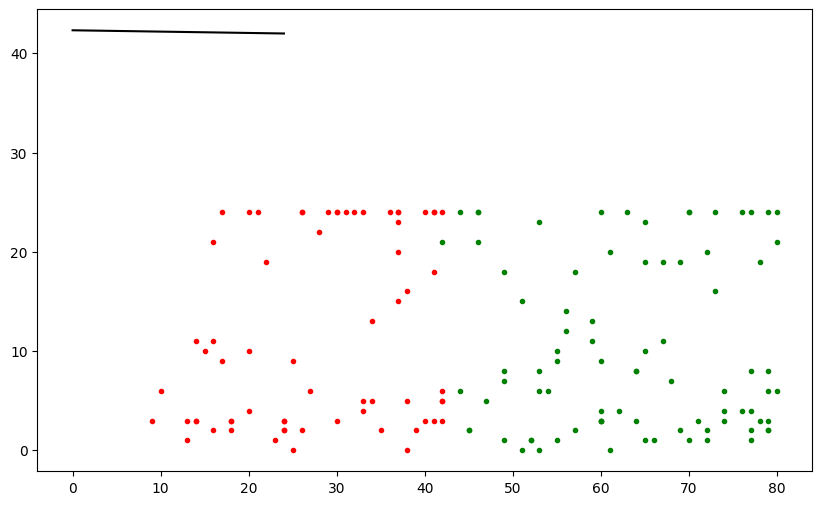

In [15]:
r1  = smf.logit( "FrontPage_On_TitleLength ~ TitleLength + Age", data=df ).fit( disp=0 ) # disp = 0 silences output

print( "~r^2: %.3f%%, p-values: TitleLength: %.3f, Age: %.3f" % ( ( r1.prsquared * 100 ), r1.pvalues["TitleLength"], r1.pvalues["Age"] ) )

frontpage     = df[ df.FrontPage_On_TitleLength == 1.0 ]
not_frontpage = df[ df.FrontPage_On_TitleLength == 0.0 ]


plot( frontpage.TitleLength, frontpage.Age, 'g.' )
plot( not_frontpage.TitleLength, not_frontpage.Age, 'r.' )

par = dict( r1.params )
plt.plot( xs, (1/par['TitleLength'])*(logit(.5) - par['Intercept'] - par['Age']*xs), color='Black' )
